# Parte 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize

df = pd.read_csv("xy.csv")

lista_y = [i for i in df.sum(axis=0, numeric_only=True)] #Se puede hacer así o iterando
lista_x = [i for i in df.sum(axis=1, numeric_only=True)] #Se puede obtener por medio de una doble iteración, puesto que pandas solo lee columnas

print(lista_y)
print(lista_x)

vect_x = range(5,16)
vect_y = range(5,26)

[0.03698, 0.033639999999999996, 0.03105, 0.03481, 0.03546, 0.03950000000000001, 0.04947, 0.04839, 0.06362999999999999, 0.08419000000000001, 0.07855999999999999, 0.08192999999999999, 0.06626000000000001, 0.05344000000000001, 0.04440000000000001, 0.039810000000000005, 0.03691, 0.0343, 0.041370000000000004, 0.029390000000000003, 0.036570000000000005]
[0.06713999999999999, 0.07171999999999999, 0.08327, 0.0923, 0.12226000000000001, 0.14148999999999998, 0.12172000000000001, 0.09834000000000001, 0.07686, 0.059770000000000004, 0.06518999999999998]


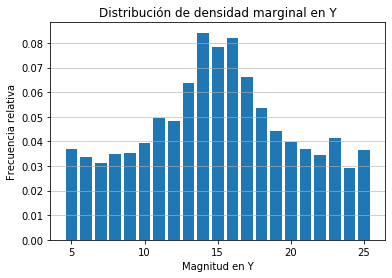

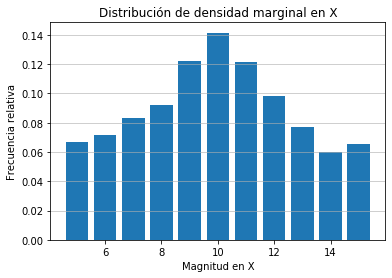

In [2]:
plt.bar(vect_y ,lista_y)
plt.title('Distribución de densidad marginal en Y')
plt.xlabel('Magnitud en Y')
plt.ylabel('Frecuencia relativa')
plt.grid(axis='y', alpha=0.75)
plt.show()


plt.bar(vect_x ,lista_x)
plt.title('Distribución de densidad marginal en X')
plt.xlabel('Magnitud en X')
plt.ylabel('Frecuencia relativa')
plt.grid(axis='y', alpha=0.75)
plt.show()

Sigma:  3.2994428756632264 
Mu:  9.904843809352778


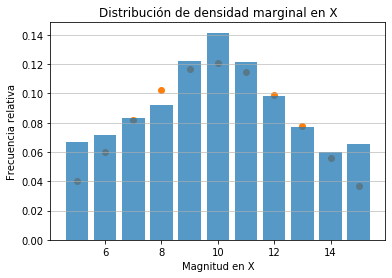

In [12]:
def normal(dominio, sigma, mu):
    return (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp(-((dominio-mu)**2)/(2*sigma**2))

paramsX, params_covarianceX = scipy.optimize.curve_fit(normal, vect_x, lista_x)

x_fit = normal(vect_x, paramsX[0], paramsX[1])
plt.bar(vect_x, lista_x, alpha=0.75)
plt.title('Distribución de densidad marginal en X')
plt.xlabel('Magnitud en X')
plt.ylabel('Frecuencia relativa')
plt.grid(axis='y', alpha=0.75)
plt.scatter(vect_x, x_fit)

print("Sigma: ", paramsX[0], "\nMu: ", paramsX[1])

Sigma:  6.0269377486808775 
Mu:  15.079460901084733


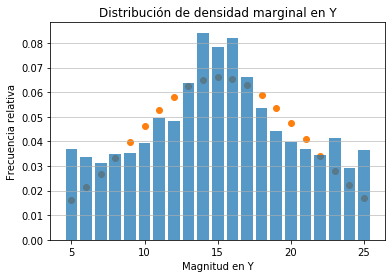

In [13]:
paramsY, params_covarianceY = scipy.optimize.curve_fit(normal, vect_y, lista_y)

y_fit = normal(vect_y, paramsY[0], paramsY[1])
plt.bar(vect_y, lista_y, alpha=0.75)
plt.title('Distribución de densidad marginal en Y')
plt.xlabel('Magnitud en Y')
plt.ylabel('Frecuencia relativa')
plt.grid(axis='y', alpha=0.75)
plt.scatter(vect_y, y_fit)

print("Sigma: ", paramsY[0], "\nMu: ", paramsY[1])

# Parte 3

In [14]:
df_p = pd.read_csv("xyp.csv")

mult = df_p['x']*df_p['y']*df_p['p']

suma = mult.sum()
print(suma)

149.54281


In [15]:
Ex = df_p['x']*df_p['p']
Ey = df_p['y']*df_p['p']
print(Ex.sum()*Ey.sum())

#No están correlacionadas

149.48404853760002


In [16]:
covarianza = suma - (Ex.sum()*Ey.sum())
covarianza



0.058761462399985476

In [17]:
print(np.std(lista_x))
print(np.std(lista_y))


0.02588051368172108
0.0168064357341516


In [18]:
#Coeficiente de pearson
pearson = covarianza/(paramsX[0]*paramsY[0])
pearson

0.0029549849692715293

# Parte 4

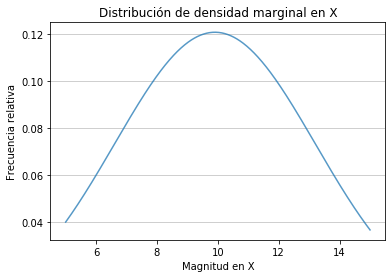

In [19]:
#Se grafica la curva de mejor ajuste
espacio_X = np.linspace(5, 15, 500)

curva_X = normal(espacio_X, paramsX[0], paramsX[1])
plt.plot(espacio_X, curva_X, alpha=0.75)
plt.title('Distribución de densidad marginal en X')
plt.xlabel('Magnitud en X')
plt.ylabel('Frecuencia relativa')
plt.grid(axis='y', alpha=0.75)
plt.show()

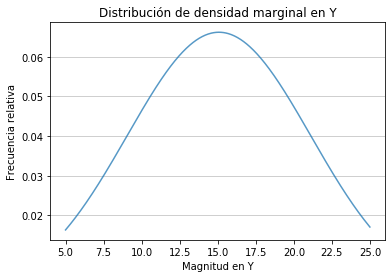

In [20]:
espacio_Y = np.linspace(5, 25, 500)
curva_Y = normal(espacio_Y, paramsY[0], paramsY[1])
plt.plot(espacio_Y, curva_Y, alpha=0.75)
plt.title('Distribución de densidad marginal en Y')
plt.xlabel('Magnitud en Y')
plt.ylabel('Frecuencia relativa')
plt.grid(axis='y', alpha=0.75)
plt.show()

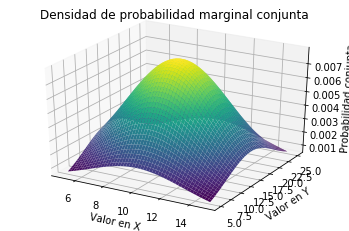

In [16]:
from mpl_toolkits.mplot3d import Axes3D

#Se obtiene utilizando la función de probabilidad conjunta como el vector z
X, Y = np.meshgrid(espacio_X, espacio_Y) #Se crea una matriz de coordenadas
Z = (1/(2*np.pi*3.30*6.03))*np.exp(-(((X-9.9)**2)/(2*3.3**2) + ((Y-15.08)**2)/(2*6.03**2)))
fig = plt.figure()

ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor = 'none')
ax.set_title('Densidad de probabilidad marginal conjunta')
ax.set_xlabel('Valor en X')
ax.set_ylabel('Valor en Y')
ax.set_zlabel('Probabilidad conjunta')
plt.show()